**Milestone 1**       [**Weightage - 5%**]

**Business understanding**


### Milestone 2 : Data Understanding

In [86]:
from tqdm import tqdm
import os
import time
from random import randint
 
import gc 
import numpy as np
from scipy import stats
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.model_selection import KFold

import nibabel as nib
import pydicom as pdm
import nilearn as nl
import nilearn.plotting as nlplt
import h5py

import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.animation as anim
import matplotlib.patches as mpatches
import matplotlib.gridspec as gridspec

import seaborn as sns
import imageio
from skimage.transform import resize
from skimage.util import montage

from IPython.display import Image as show_gif
from IPython.display import clear_output
from IPython.display import YouTubeVideo

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F

from torch.optim import Adam
from torch.optim.lr_scheduler import ReduceLROnPlateau
from torch.nn import MSELoss

# !pip install albumentations==0.4.6
import albumentations as A
# from albumentations.pytorch import ToTensor, ToTensorV2


from albumentations import Compose, HorizontalFlip
# from albumentations.pytorch import ToTensor, ToTensorV2 

import warnings
warnings.simplefilter("ignore")

In [ ]:
**Milestone 1**       [**Weightage - 5%**]

In [87]:
# code wall time starts(cw0)
cw0 = time.time() 

# data loading time starts(dl0)
dl0 = time.time() 

In [88]:
sample_filename = '../input/brats20-dataset-training-validation/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_001/BraTS20_Training_001_flair.nii'
sample_filename_mask = '../input/brats20-dataset-training-validation/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_001/BraTS20_Training_001_seg.nii'
sample_img = nib.load(sample_filename)
sample_img = np.asanyarray(sample_img.dataobj)
sample_img = np.rot90(sample_img)
sample_mask = nib.load(sample_filename_mask)
sample_mask = np.asanyarray(sample_mask.dataobj)
sample_mask = np.rot90(sample_mask)
print("img shape ->", sample_img.shape)
print("mask shape ->", sample_mask.shape)

#load --> conversion to array --> rotate 90 

img shape -> (240, 240, 155)
mask shape -> (240, 240, 155)


#### Question 1: Submit the value of `image shape` and `mask shape` obtained in the cell above.

Note: Copy the value of img shape and mask shape in the method below. The first value is the image size and the second value is the mask size

In [89]:
# Returns sample image size and sample mask size in a form of tuple, the first value is the image size and the second value is the mask size
def submit_sample_mask_image_size()->tuple:    
    img_shape = (220, 240, 155)
    mask_shape = (240, 240, 155)

    return img_shape,mask_shape    

In [90]:
sample_filename2 = '../input/brats20-dataset-training-validation/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_001/BraTS20_Training_001_t1.nii'
sample_img2 = nib.load(sample_filename2)
sample_img2 = np.asanyarray(sample_img2.dataobj)
sample_img2  = np.rot90(sample_img2)

sample_filename3 = '../input/brats20-dataset-training-validation/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_001/BraTS20_Training_001_t2.nii'
sample_img3 = nib.load(sample_filename3)
sample_img3 = np.asanyarray(sample_img3.dataobj)
sample_img3  = np.rot90(sample_img3)

sample_filename4 = '../input/brats20-dataset-training-validation/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_001/BraTS20_Training_001_t1ce.nii'
sample_img4 = nib.load(sample_filename4)
sample_img4 = np.asanyarray(sample_img4.dataobj)
sample_img4  = np.rot90(sample_img4)

# WHOLE TUOMUR / ED - LABEL 2 
mask_WT = sample_mask.copy()
mask_WT[mask_WT == 1] = 1
mask_WT[mask_WT == 2] = 1
mask_WT[mask_WT == 4] = 1

# NCR OR NET - LABEL 1 
mask_TC = sample_mask.copy()
mask_TC[mask_TC == 1] = 1
mask_TC[mask_TC == 2] = 0
mask_TC[mask_TC == 4] = 1

# ET - LABEL 4 
mask_ET = sample_mask.copy()
mask_ET[mask_ET == 1] = 0
mask_ET[mask_ET == 2] = 0
mask_ET[mask_ET == 4] = 1

In [91]:
# total data loading time(dlt) 
dl1 = time.time() 
dlt = dl1 - dl0
print("Data loading time : ", dlt )

Data loading time :  0.17042827606201172


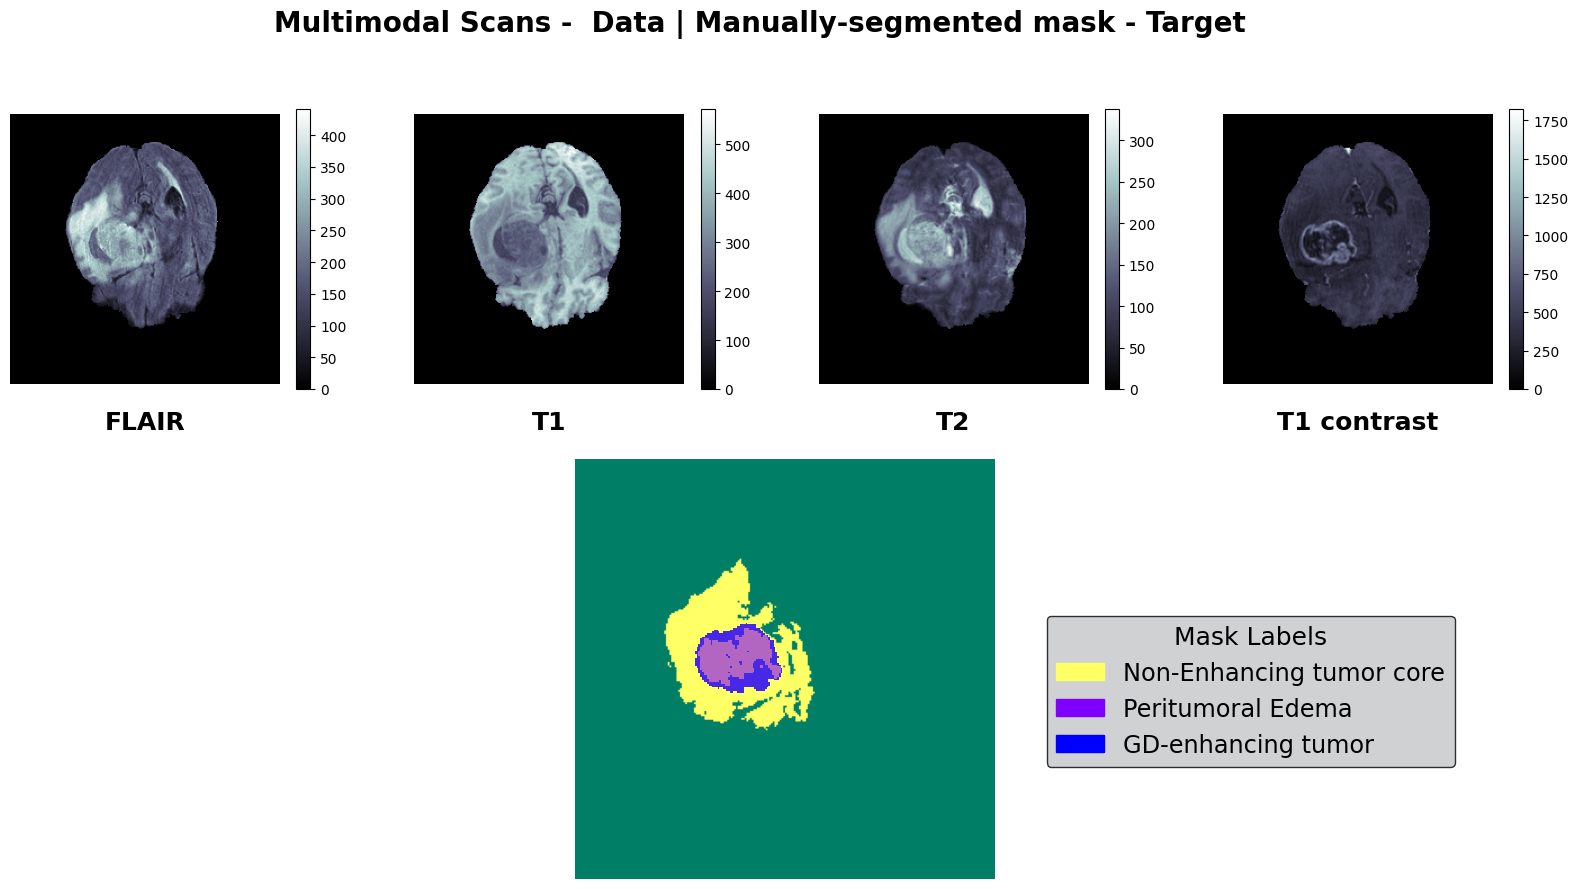

In [92]:
# https://matplotlib.org/3.3.2/gallery/images_contours_and_fields/plot_streamplot.html#sphx-glr-gallery-images-contours-and-fields-plot-streamplot-py
# https://stackoverflow.com/questions/25482876/how-to-add-legend-to-imshow-in-matplotlib
fig = plt.figure(figsize=(20, 10))

gs = gridspec.GridSpec(nrows=2, ncols=4, height_ratios=[1, 1.5])

#  Varying density along a streamline
ax0 = fig.add_subplot(gs[0, 0])
flair = ax0.imshow(sample_img[:,:,65], cmap='bone')
ax0.set_title("FLAIR", fontsize=18, weight='bold', y=-0.2)
fig.colorbar(flair)

#  Varying density along a streamline
ax1 = fig.add_subplot(gs[0, 1])
t1 = ax1.imshow(sample_img2[:,:,65], cmap='bone')
ax1.set_title("T1", fontsize=18, weight='bold', y=-0.2)
fig.colorbar(t1)

#  Varying density along a streamline
ax2 = fig.add_subplot(gs[0, 2])
t2 = ax2.imshow(sample_img3[:,:,65], cmap='bone')
ax2.set_title("T2", fontsize=18, weight='bold', y=-0.2)
fig.colorbar(t2)

#  Varying density along a streamline
ax3 = fig.add_subplot(gs[0, 3])
t1ce = ax3.imshow(sample_img4[:,:,65], cmap='bone')
ax3.set_title("T1 contrast", fontsize=18, weight='bold', y=-0.2)
fig.colorbar(t1ce)

#  Varying density along a streamline
ax4 = fig.add_subplot(gs[1, 1:3])

#ax4.imshow(np.ma.masked_where(mask_WT[:,:,65]== False,  mask_WT[:,:,65]), cmap='summer', alpha=0.6)
l1 = ax4.imshow(mask_WT[:,:,65], cmap='summer',)
l2 = ax4.imshow(np.ma.masked_where(mask_TC[:,:,65]== False,  mask_TC[:,:,65]), cmap='rainbow', alpha=0.6)
l3 = ax4.imshow(np.ma.masked_where(mask_ET[:,:,65] == False, mask_ET[:,:,65]), cmap='winter', alpha=0.6)

ax4.set_title("", fontsize=20, weight='bold', y=-0.1)

_ = [ax.set_axis_off() for ax in [ax0,ax1,ax2,ax3, ax4]]

colors = [im.cmap(im.norm(1)) for im in [l1,l2, l3]]
labels = ['Non-Enhancing tumor core', 'Peritumoral Edema ', 'GD-enhancing tumor']
patches = [ mpatches.Patch(color=colors[i], label=f"{labels[i]}") for i in range(len(labels))]
# put those patched as legend-handles into the legend
plt.legend(handles=patches, bbox_to_anchor=(1.1, 0.65), loc=2, borderaxespad=0.4,fontsize = 'xx-large',
           title='Mask Labels', title_fontsize=18, edgecolor="black",  facecolor='#c5c6c7')

plt.suptitle("Multimodal Scans -  Data | Manually-segmented mask - Target", fontsize=20, weight='bold')

fig.savefig("data_sample.png", format="png",  pad_inches=0.2, transparent=False, bbox_inches='tight')
fig.savefig("data_sample.svg", format="svg",  pad_inches=0.2, transparent=False, bbox_inches='tight')

### Milestone 3 : Data pre-processing

In [93]:
class Image3dToGIF3d:
    """
    Displaying 3D images in 3d axes.
    Parameters:
        img_dim: shape of cube for resizing.
        figsize: figure size for plotting in inches.
    """
    def __init__(self, 
                 img_dim: tuple = (55, 55, 55),
                 figsize: tuple = (15, 10),
                 binary: bool = False,
                 normalizing: bool = True,
                ):
        """Initialization."""
        self.img_dim = img_dim
        print(img_dim)
        self.figsize = figsize
        self.binary = binary
        self.normalizing = normalizing

    def _explode(self, data: np.ndarray):
        """
        Takes: array and return an array twice as large in each dimension,
        with an extra space between each voxel.
        """
        shape_arr = np.array(data.shape)
        size = shape_arr[:3] * 2 - 1
        exploded = np.zeros(np.concatenate([size, shape_arr[3:]]),
                            dtype=data.dtype)
        exploded[::2, ::2, ::2] = data
        return exploded

    def _expand_coordinates(self, indices: np.ndarray):
        x, y, z = indices
        x[1::2, :, :] += 1
        y[:, 1::2, :] += 1
        z[:, :, 1::2] += 1
        return x, y, z
    
    def _normalize(self, arr: np.ndarray):
        """Normilize image value between 0 and 1."""
        arr_min = np.min(arr)
        return (arr - arr_min) / (np.max(arr) - arr_min)

    
    def _scale_by(self, arr: np.ndarray, factor: int):
        """
        Scale 3d Image to factor.
        Parameters:
            arr: 3d image for scalling.
            factor: factor for scalling.
        """
        mean = np.mean(arr)
        return (arr - mean) * factor + mean
    
    def get_transformed_data(self, data: np.ndarray):
        """Data transformation: normalization, scaling, resizing."""
        if self.binary:
            resized_data = resize(data, self.img_dim, preserve_range=True)
            return np.clip(resized_data.astype(np.uint8), 0, 1).astype(np.float32)
            
        norm_data = np.clip(self._normalize(data)-0.1, 0, 1) ** 0.4
        scaled_data = np.clip(self._scale_by(norm_data, 2) - 0.1, 0, 1)
        resized_data = resize(scaled_data, self.img_dim, preserve_range=True)
        
        return resized_data
    
    def plot_cube(self,
                  cube,
                  title: str = '', 
                  init_angle: int = 0,
                  make_gif: bool = False,
                  path_to_save: str = 'filename.gif'
                 ):
        """
        Plot 3d data.
        Parameters:
            cube: 3d data
            title: title for figure.
            init_angle: angle for image plot (from 0-360).
            make_gif: if True create gif from every 5th frames from 3d image plot.
            path_to_save: path to save GIF file.
            """
        if self.binary:
            facecolors = cm.winter(cube)
            print("binary")
        else:
            if self.normalizing:
                cube = self._normalize(cube)
            facecolors = cm.gist_stern(cube)
            print("not binary")
            
        facecolors[:,:,:,-1] = cube
        facecolors = self._explode(facecolors)

        filled = facecolors[:,:,:,-1] != 0
        x, y, z = self._expand_coordinates(np.indices(np.array(filled.shape) + 1))

        with plt.style.context("dark_background"):

            fig = plt.figure(figsize=self.figsize)
            ax = fig.gca(projection='3d')

            ax.view_init(30, init_angle)
            ax.set_xlim(right = self.img_dim[0] * 2)
            ax.set_ylim(top = self.img_dim[1] * 2)
            ax.set_zlim(top = self.img_dim[2] * 2)
            ax.set_title(title, fontsize=18, y=1.05)

            ax.voxels(x, y, z, filled, facecolors=facecolors, shade=False)

            if make_gif:
                images = []
                for angle in tqdm(range(0, 360, 5)):
                    ax.view_init(30, angle)
                    fname = str(angle) + '.png'

                    plt.savefig(fname, dpi=120, format='png', bbox_inches='tight')
                    images.append(imageio.imread(fname))
                    #os.remove(fname)
                imageio.mimsave(path_to_save, images)
                plt.close()

            else:
                plt.show()

                
class ShowResult:
  
    def mask_preprocessing(self, mask):
        """
        Test.
        """
        # removing all the ones in the tensor --> using cpu --> removing the tensor from its computational graph --> tensor to numpy conversion 
        mask = mask.squeeze().cpu().detach().numpy()
        mask = np.moveaxis(mask, (0, 1, 2, 3), (0, 3, 2, 1))

        mask_WT = np.rot90(montage(mask[0]))
        mask_TC = np.rot90(montage(mask[1]))
        mask_ET = np.rot90(montage(mask[2]))

        return mask_WT, mask_TC, mask_ET

    def image_preprocessing(self, image):
        """
        Returns image flair as mask for overlaping gt and predictions.
        """
        image = image.squeeze().cpu().detach().numpy()
        image = np.moveaxis(image, (0, 1, 2, 3), (0, 3, 2, 1))
        flair_img = np.rot90(montage(image[0]))
        return flair_img
    
    def plot(self, image, ground_truth, prediction):
        image = self.image_preprocessing(image)
        gt_mask_WT, gt_mask_TC, gt_mask_ET = self.mask_preprocessing(ground_truth)
        pr_mask_WT, pr_mask_TC, pr_mask_ET = self.mask_preprocessing(prediction)
        
        fig, axes = plt.subplots(1, 2, figsize = (35, 30))
    
        [ax.axis("off") for ax in axes]
        axes[0].set_title("Ground Truth", fontsize=35, weight='bold')
        axes[0].imshow(image, cmap ='bone')
        axes[0].imshow(np.ma.masked_where(gt_mask_WT == False, gt_mask_WT),
                  cmap='cool_r', alpha=0.6)
        axes[0].imshow(np.ma.masked_where(gt_mask_TC == False, gt_mask_TC),
                  cmap='autumn_r', alpha=0.6)
        axes[0].imshow(np.ma.masked_where(gt_mask_ET == False, gt_mask_ET),
                  cmap='autumn', alpha=0.6)

        axes[1].set_title("Prediction", fontsize=35, weight='bold')
        axes[1].imshow(image, cmap ='bone')
        axes[1].imshow(np.ma.masked_where(pr_mask_WT == False, pr_mask_WT),
                  cmap='cool_r', alpha=0.6)
        axes[1].imshow(np.ma.masked_where(pr_mask_TC == False, pr_mask_TC),
                  cmap='autumn_r', alpha=0.6)
        axes[1].imshow(np.ma.masked_where(pr_mask_ET == False, pr_mask_ET),
                  cmap='autumn', alpha=0.6)

        plt.tight_layout()
        
        plt.show()
        
#show_result = ShowResult()
#show_result.plot(data['image'], data['mask'], data['mask'])


def merging_two_gif(path1: str, path2: str, name_to_save: str):
    """
    Merging GIFs side by side.
    Parameters:
        path1: path to gif with ground truth.
        path2: path to gif with prediction.
        name_to_save: name for saving new GIF.
    """
    #https://stackoverflow.com/questions/51517685/combine-several-gif-horizontally-python
    #Create reader object for the gif
    gif1 = imageio.get_reader(path1)
    gif2 = imageio.get_reader(path2)

    #If they don't have the same number of frame take the shorter
    number_of_frames = min(gif1.get_length(), gif2.get_length()) 

    #Create writer object
    new_gif = imageio.get_writer(name_to_save)

    for frame_number in range(number_of_frames):
        img1 = gif1.get_next_data()
        img2 = gif2.get_next_data()
        #here is the magic
        new_image = np.hstack((img1, img2))
        new_gif.append_data(new_image)

    gif1.close()
    gif2.close()    
    new_gif.close()
    
#merging_two_gif('BraTS20_Training_001_flair_3d.gif',
#                'BraTS20_Training_001_flair_3d.gif', 
#                'result.gif')

def get_all_csv_file(root: str) -> list:
    """Extraction all unique ids from file names."""
    ids = []
    for dirname, _, filenames in os.walk(root):
        for filename in filenames:
            path = os.path.join(dirname, filename)
            if path.endswith(".csv"):
                ids.append(path) 
    ids = list(set(filter(None, ids)))
    print(f"Extracted {len(ids)} csv files.")
    return ids

#csv_paths = get_all_csv_file("../input/brats20-dataset-training-validation/BraTS2020_TrainingData")

In [94]:
class GlobalConfig:
    root_dir = '../input/brats20-dataset-training-validation'
    train_root_dir = '../input/brats20-dataset-training-validation/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData'
    test_root_dir = '../input/brats20-dataset-training-validation/BraTS2020_ValidationData/MICCAI_BraTS2020_ValidationData'
    path_to_csv = './train_data.csv'
    pretrained_model_path = '../input/brats20logs/brats2020logs/unet/last_epoch_model.pth'
    train_logs_path = '../input/brats20logs/brats2020logs/unet/train_log.csv'
    ae_pretrained_model_path = '../input/brats20logs/brats2020logs/ae/autoencoder_best_model.pth'
    tab_data = '../input/brats20logs/brats2020logs/data/df_with_voxel_stats_and_latent_features.csv'
    seed = 55
    
def seed_everything(seed: int):
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed(seed)
    
config = GlobalConfig()
seed_everything(config.seed)

In [95]:
# data pre-processing time starts(dpp0)
dpp0 = time.time()

In [96]:
survival_info_df = pd.read_csv('../input/brats20-dataset-training-validation/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/survival_info.csv')
name_mapping_df = pd.read_csv('../input/brats20-dataset-training-validation/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/name_mapping.csv')

name_mapping_df.rename({'BraTS_2020_subject_ID': 'Brats20ID'}, axis=1, inplace=True) 


df = survival_info_df.merge(name_mapping_df, on="Brats20ID", how="right")

# renaming & merging into one dataframe

In [97]:
paths = []
for _, row  in df.iterrows():
    
    id_ = row['Brats20ID']
    phase = id_.split("_")[-2]
    if phase == 'Training':
        path = os.path.join(config.train_root_dir, id_)
    else:
        path = os.path.join(config.test_root_dir, id_)
    paths.append(path)
    
df['path'] = paths

# config.train_root_dir = "/data/training"
# id_ = "BraTS20_Training_001"
# path = os.path.join(config.train_root_dir, id_)
# output ==> path = /data/training/BraTS20_Training_001

#split data on train, test, split
#train_df, val_df = train_test_split(train_df, test_size=0.1, random_state=69, shuffle=True)
#train_df, val_df = train_df.reset_index(drop=True), val_df.reset_index(drop=True)

In [98]:
# Data cleaning - removing all null age entries
train_data = df.loc[df['Age'].notnull()].reset_index(drop=True)

# Calculating Age rank for the basis of K - Fold stratification
train_data["Age_rank"] =  train_data["Age"] // 10 * 10
train_data = train_data.loc[train_data['Brats20ID'] != 'BraTS20_Training_355'].reset_index(drop=True, )

len(df)

369

In [99]:
train_data.head()

,Brats20ID,Age,Survival_days,Extent_of_Resection,Grade,BraTS_2017_subject_ID,BraTS_2018_subject_ID,TCGA_TCIA_subject_ID,BraTS_2019_subject_ID,path,Age_rank
0,BraTS20_Training_001,60.463,289,GTR,HGG,Brats17_CBICA_AAB_1,Brats18_CBICA_AAB_1,NaN,BraTS19_CBICA_AAB_1,../input/brats20-dataset-training-validation/B...,60.0
1,BraTS20_Training_002,52.263,616,GTR,HGG,Brats17_CBICA_AAG_1,Brats18_CBICA_AAG_1,NaN,BraTS19_CBICA_AAG_1,../input/brats20-dataset-training-validation/B...,50.0
2,BraTS20_Training_003,54.301,464,GTR,HGG,Brats17_CBICA_AAL_1,Brats18_CBICA_AAL_1,NaN,BraTS19_CBICA_AAL_1,../input/brats20-dataset-training-validation/B...,50.0
3,BraTS20_Training_004,39.068,788,GTR,HGG,Brats17_CBICA_AAP_1,Brats18_CBICA_AAP_1,NaN,BraTS19_CBICA_AAP_1,../input/brats20-dataset-training-validation/B...,30.0
4,BraTS20_Training_005,68.493,465,GTR,HGG,Brats17_CBICA_ABB_1,Brats18_CBICA_ABB_1,NaN,BraTS19_CBICA_ABB_1,../input/brats20-dataset-training-validation/B...,60.0


In [100]:
# stratified k-fold ( skf ) time starts 
skf0 = time.time()

In [101]:
skf = StratifiedKFold(
    n_splits=7, random_state=config.seed, shuffle=True
)

# enumeratng all entries for defining the fold number 
# assigning the fold number in increment order 
for i, (train_index, val_index) in enumerate(
        skf.split(train_data, train_data["Age_rank"])
        ):
        train_data.loc[val_index, "fold"] = i

In [102]:
# total stratification time(skft) 
skf1 = time.time()
skft = skf1 - skf0 
print("Stratification time : ",skft ) 

Stratification time :  0.0561978816986084


In [103]:
# splitting of the data wasn't done for train , test &  validation data 
train_df = train_data.loc[train_data['fold'] != 0].reset_index(drop=True)
val_df = train_data.loc[train_data['fold'] == 0].reset_index(drop=True)

# selecting the rows where the AGE col. is null --> test_df 
test_df = df.loc[~df['Age'].notnull()].reset_index(drop=True)
print("train_df ->", train_df.shape, "val_df ->", val_df.shape, "test_df ->", test_df.shape)

train_df -> (201, 12) val_df -> (34, 12) test_df -> (133, 10)


In [104]:
# total data pre-processing time(dppt)
dpp1 = time.time() 
dppt = dpp1 - dpp0 - skft
print("Data preprocessing time : ", dppt  )

Data preprocessing time :  0.24777841567993164


In [105]:
train_data.to_csv("train_data.csv", index=False)
test_df.to_csv("test_df.csv", index=False)
train_df.to_csv("train_df.csv", index=False)

In [106]:
train_df.shape

(201, 12)

In [107]:
class BratsDataset(Dataset):
    def __init__(self, df: pd.DataFrame, phase: str="test", is_resize: bool=False):
        self.df = df
        self.phase = phase
        self.augmentations = get_augmentations(phase)
        self.data_types = ['_flair.nii', '_t1.nii', '_t1ce.nii', '_t2.nii']
        self.is_resize = is_resize
        
    def __len__(self):
        return self.df.shape[0] 
    
    def __getitem__(self, idx):
        # at a specified index ( idx ) select the value under 'Brats20ID' & asssign it to id_ 
        id_ = self.df.loc[idx, 'Brats20ID']
        
        # As we've got the id_ , now find the path of the entry by asserting the Brats20ID to id_ 
        root_path = self.df.loc[self.df['Brats20ID'] == id_]['path'].values[0]
        
        # load all modalities
        images = []
        
        for data_type in self.data_types:
            # here data_type is appended to the root path, as it only contains the name without the datatype such as .nii etc
            img_path = os.path.join(root_path, id_ + data_type) 
            img = self.load_img(img_path)#.transpose(2, 0, 1)
            
            if self.is_resize:
                img = self.resize(img)
    
            img = self.normalize(img)
            images.append(img)
            
        # stacking all the t1 , t1ce , t2 , t2 flair files of a single ID in a stack 
        img = np.stack(images)
        img = np.moveaxis(img, (0, 1, 2, 3), (0, 3, 2, 1))
        
        if self.phase != "test":
            mask_path =  os.path.join(root_path, id_ + "_seg.nii")
            mask = self.load_img(mask_path)
            
            if self.is_resize:
                mask = self.resize(mask)
                # mask --> conversion to uint8 --> normalization / clipping ( 0 to 1 ) --> conversion to float32 
                mask = np.clip(mask.astype(np.uint8), 0, 1).astype(np.float32)
                # again clipping ( 0 to 1 ) 
                mask = np.clip(mask, 0, 1)
            
            # setting the mask labels 1 , 2 , 4 for the mask file ( _seg.ii ) 
            mask = self.preprocess_mask_labels(mask)
    
            augmented = self.augmentations(image=img.astype(np.float32), 
                                           mask=mask.astype(np.float32))
            # Several augmentations / transformations like flipping, rotating, padding will be applied to both the images 
            img = augmented['image']
            mask = augmented['mask']
    
        
            return {
                "Id": id_,
                "image": img,
                "mask": mask,
            }
        
        return {
            "Id": id_,
            "image": img,
        }
    
    def load_img(self, file_path):
        data = nib.load(file_path)
        data = np.asarray(data.dataobj)
        return data
    
    def normalize(self, data: np.ndarray):
        data_min = np.min(data)
        # normalization = (each element - min element) / ( max - min ) 
        return (data - data_min) / (np.max(data) - data_min)
    
    def resize(self, data: np.ndarray):
        data = resize(data, (78, 120, 120), preserve_range=True)
        return data
    
    def preprocess_mask_labels(self, mask: np.ndarray):

        # whole tumour
        mask_WT = mask.copy()
        mask_WT[mask_WT == 1] = 1
        mask_WT[mask_WT == 2] = 1
        mask_WT[mask_WT == 4] = 1
        # include all tumours 

        # NCR / NET - LABEL 1
        mask_TC = mask.copy()
        mask_TC[mask_TC == 1] = 1
        mask_TC[mask_TC == 2] = 0
        mask_TC[mask_TC == 4] = 1
        # exclude 2 / 4 labelled tumour 
        
        # ET - LABEL 4 
        mask_ET = mask.copy()
        mask_ET[mask_ET == 1] = 0
        mask_ET[mask_ET == 2] = 0
        mask_ET[mask_ET == 4] = 1
        # exclude 2 / 1 labelled tumour 
        
        # ED - LABEL 2
        # mask_ED = mask.copy()
        # mask_ED[mask_ED == 1] = 0
        # mask_ED[mask_ED == 2] = 1
        # mask_ED[mask_ED == 4] = 0


        # mask = np.stack([mask_WT, mask_TC, mask_ET, mask_ED])
        mask = np.stack([mask_WT, mask_TC, mask_ET])
        mask = np.moveaxis(mask, (0, 1, 2, 3), (0, 3, 2, 1))

        return mask   

In [108]:
def get_augmentations(phase):
    list_transforms = []
    
    # Does data augmentations & tranformation required for IMAGES & MASKS 
    # they include cropping, padding, flipping , rotating 
    list_trfms = Compose(list_transforms)
    return list_trfms


def get_dataloader(
    dataset: torch.utils.data.Dataset,
    path_to_csv: str,
    phase: str,
    fold: int = 0,
    batch_size: int = 1,
    num_workers: int = 4 ):
    
    '''Returns: dataloader for the model training'''
    df = pd.read_csv(path_to_csv)
    
    # selecting train_df to be all the entries EXCEPT the mentioned fold while calling dataloader 
    train_df = df.loc[df['fold'] != fold].reset_index(drop=True)
    
    # selection a particluar fold while calling the get_dataloader function 
    val_df = df.loc[df['fold'] == fold].reset_index(drop=True)
#     test_df = df.loc[~df['Age'].notnull()].reset_index(drop=True)
#     print(len(train_df) , len(val_df), len(test_df))

    
    # read csv --> train & validation df splitting --> assigning train_df / val_df to df based on phase --> returning dataloader 
    # how does val_df / train_df got converted to ( id , image tensor , mask tensor )
    
    if phase == "train" : 
        df = train_df 
    elif phase == "valid" :
        df = val_df
#     else:
#         df = test_df
    dataset = dataset(df, phase)
    """
    DataLoader iteratively goes through every id in the df & gets all the individual tuples for individual ids & appends all of them 
    like this : 
    { id : ['BraTS20_Training_235'] ,
      image : [] , 
      tensor : [] , 
    } 
    { id : ['BraTS20_Training_236'] ,
      image : [] , 
      tensor : [] , 
    } 
    { id : ['BraTS20_Training_237'] ,
      image : [] , 
      tensor : [] , 
    } 
    """
    dataloader = DataLoader(
        dataset,
        batch_size=batch_size,
        num_workers=num_workers,
        pin_memory=True,
        shuffle=True,   
    )
    return dataloader

In [109]:
dataloader = get_dataloader(dataset=BratsDataset, path_to_csv='train_data.csv', phase='valid', fold=0)
len(dataloader)

34

In [110]:
data = next(iter(dataloader))
data['Id'], data['image'].shape, data['mask'].shape

# batch size , channels , spatial dimensions
# no.of images in a batch : channels : t1 , t2 , flair , weighted : dimensions

(['BraTS20_Training_162'],
 torch.Size([1, 4, 155, 240, 240]),
 torch.Size([1, 3, 155, 240, 240]))

In [111]:
print(data['image'].shape)
print(data['mask'].shape)

torch.Size([1, 4, 155, 240, 240])
torch.Size([1, 3, 155, 240, 240])


### Milestone 3 : Data Visilaization

Num uniq Image values : 398
Min/Max Image values: 0.0 1.0
Num uniq Mask values: (array([0., 1.], dtype=float32), array([8820672,  107328]))


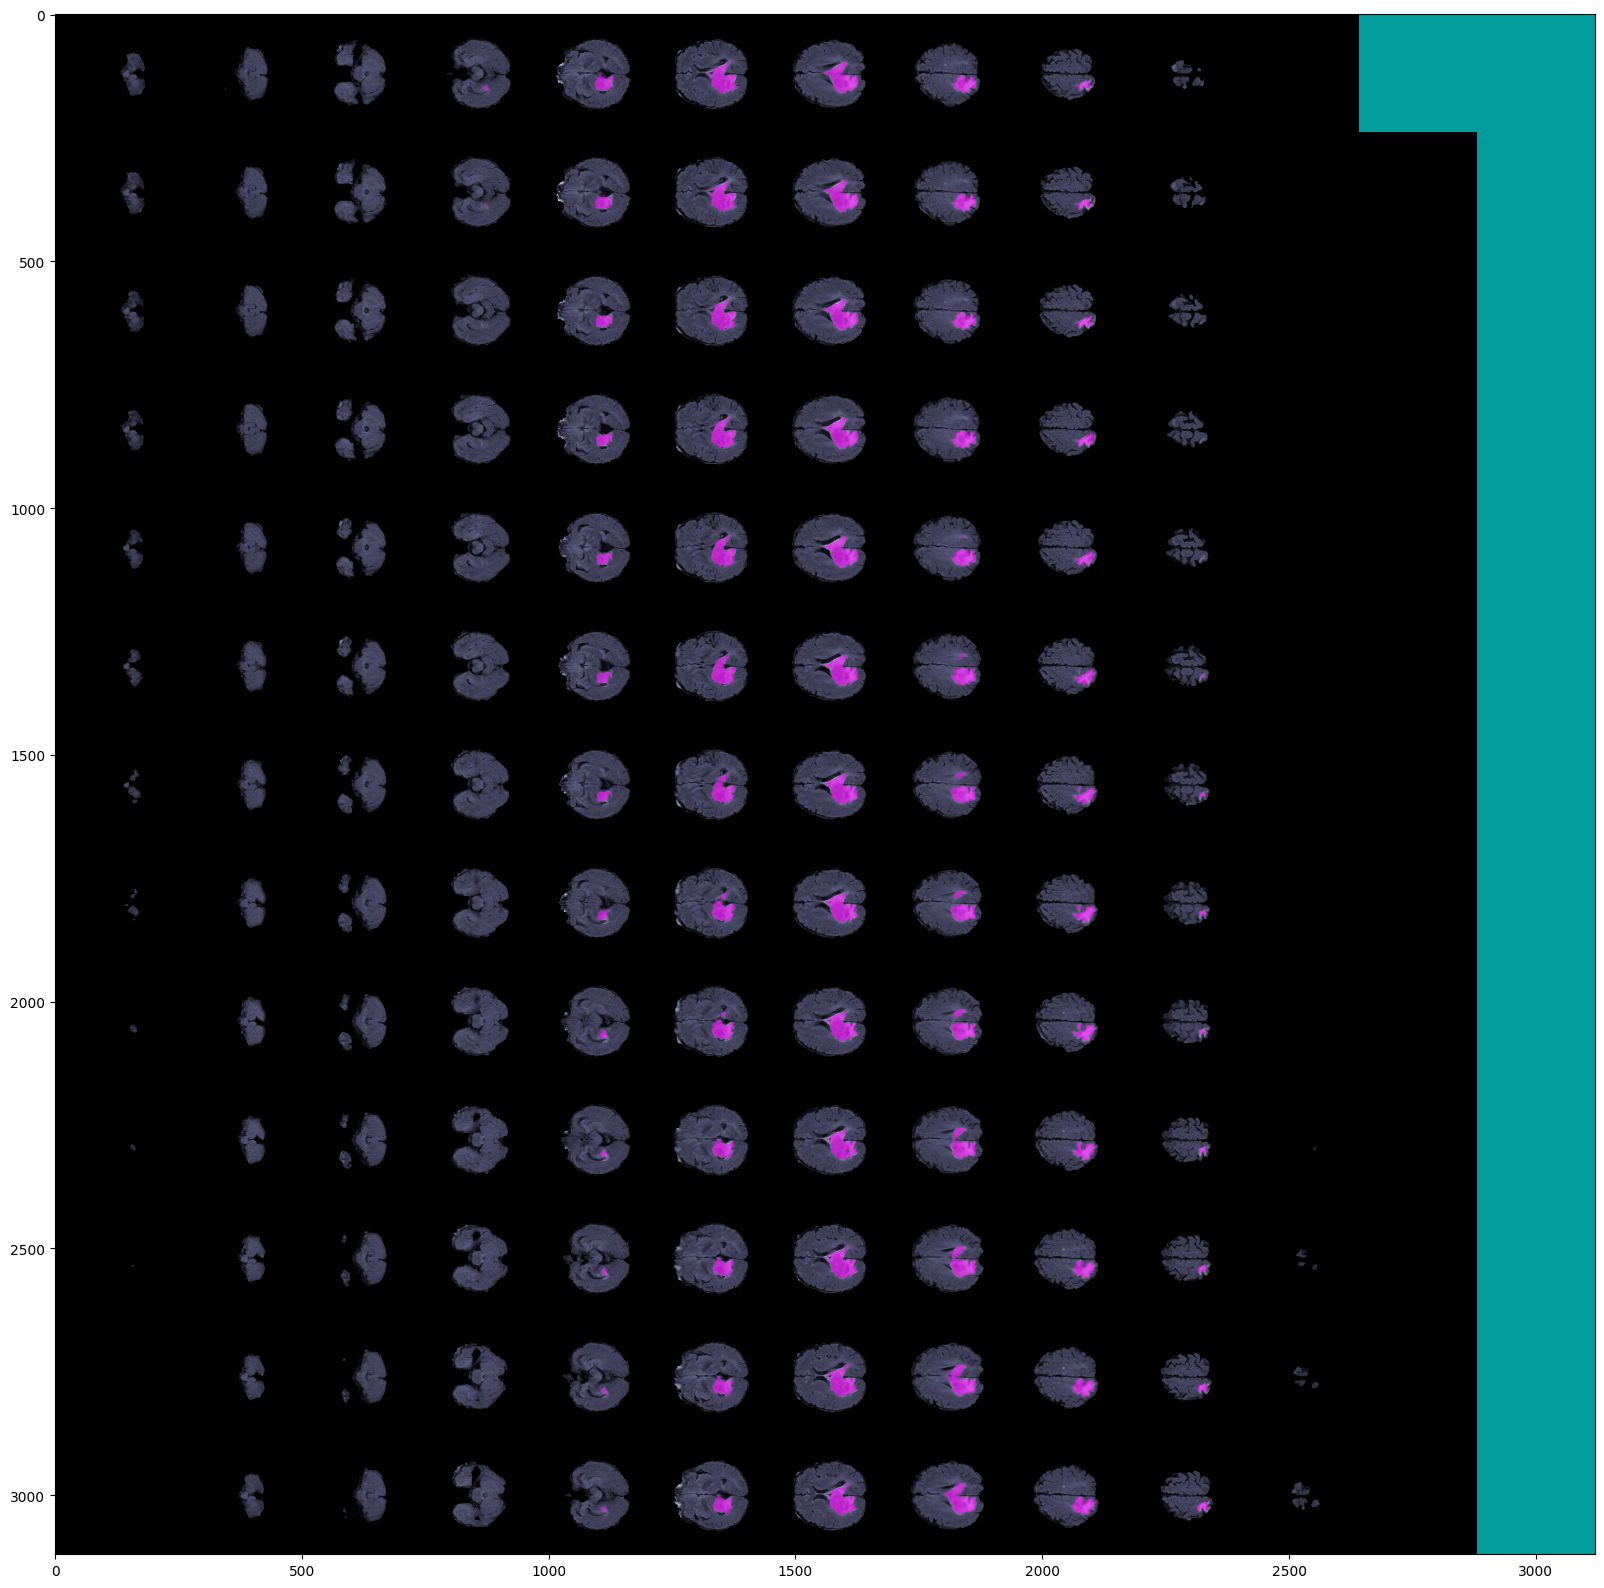

In [112]:
# Printing all the images & masks of "FOLD 0" --> 34 batches 
# 34 BATCHES of images & masks each batch containing 4 types of files t1 , t2 , t1ce , flair 

img_tensor = data['image'].squeeze()[0].cpu().detach().numpy() 
mask_tensor = data['mask'].squeeze()[0].squeeze().cpu().detach().numpy()

print("Num uniq Image values :", len(np.unique(img_tensor, return_counts=True)[0]))
print("Min/Max Image values:", img_tensor.min(), img_tensor.max())
print("Num uniq Mask values:", np.unique(mask_tensor, return_counts=True))

image = np.rot90(montage(img_tensor))
mask = np.rot90(montage(mask_tensor)) 

fig, ax = plt.subplots(1, 1, figsize = (20, 20))
ax.imshow(image, cmap ='bone')
ax.imshow(np.ma.masked_where(mask == False, mask),
           cmap='cool', alpha=0.6)

In [113]:
img_tensor.shape 
mask_tensor.shape

image = np.rot90(montage(img_tensor))
mask = np.rot90(montage(mask_tensor)) 

### Milestone 4 : Model building and evaluation

In [114]:
def dice_coef_metric(probabilities: torch.Tensor,
                     truth: torch.Tensor, 
                     treshold: float = 0.5,
                     eps: float = 1e-9) -> np.ndarray:
    """
    Calculate Dice score for data batch.
    Params:
        probobilities: model outputs after activation function.
        truth: truth values.
        threshold: threshold for probabilities.
        eps: additive to refine the estimate.
        Returns: dice score aka f1.
    """
    scores = []
    num = probabilities.shape[0] 
    predictions = (probabilities >= treshold).float()
    assert(predictions.shape == truth.shape)
    for i in range(num):
        prediction = predictions[i]
        truth_ = truth[i]
        intersection = 2.0 * (truth_ * prediction).sum()
        union = truth_.sum() + prediction.sum()
        if truth_.sum() == 0 and prediction.sum() == 0:
            scores.append(1.0)
        else:
            scores.append((intersection + eps) / union)
    return np.mean(scores)


def jaccard_coef_metric(probabilities: torch.Tensor,
               truth: torch.Tensor,
               treshold: float = 0.5,
               eps: float = 1e-9) -> np.ndarray:
    """
    Calculate Jaccard index for data batch.
    Params:
        probobilities: model outputs after activation function.
        truth: truth values.
        threshold: threshold for probabilities.
        eps: additive to refine the estimate.
        Returns: jaccard score aka iou."
    """
    scores = []
    num = probabilities.shape[0]
    predictions = (probabilities >= treshold).float()
    assert(predictions.shape == truth.shape)

    for i in range(num):
        prediction = predictions[i]
        truth_ = truth[i]
        intersection = (prediction * truth_).sum()
        union = (prediction.sum() + truth_.sum()) - intersection + eps
        if truth_.sum() == 0 and prediction.sum() == 0:
            scores.append(1.0)
        else:
            scores.append((intersection + eps) / union)
    return np.mean(scores)


class Meter:
    '''factory for storing and updating iou and dice scores.'''
    def __init__(self, treshold: float = 0.5):
        self.threshold: float = treshold
        self.dice_scores: list = []
        self.iou_scores: list = []
    
    def update(self, logits: torch.Tensor, targets: torch.Tensor):
        """
        Takes: logits from output model and targets,
        calculates dice and iou scores, and stores them in lists.
        calculates using the above declare functions 
        """
        probs = torch.sigmoid(logits)
        dice = dice_coef_metric(probs, targets, self.threshold)
        iou = jaccard_coef_metric(probs, targets, self.threshold)
        
        # appending to the respective lists 
        self.dice_scores.append(dice)
        self.iou_scores.append(iou)
    
    def get_metrics(self) -> np.ndarray:
        """
        Returns: the average of the accumulated dice and iou scores.
        """
        dice = np.mean(self.dice_scores)
        iou = np.mean(self.iou_scores)
        return dice, iou


class DiceLoss(nn.Module):
    """Calculate dice loss."""
    def __init__(self, eps: float = 1e-9):
        super(DiceLoss, self).__init__()
        self.eps = eps
        
    def forward(self,
                logits: torch.Tensor,
                targets: torch.Tensor) -> torch.Tensor:
        
        num = targets.size(0)
        probability = torch.sigmoid(logits)
        probability = probability.view(num, -1)
        targets = targets.view(num, -1)
        assert(probability.shape == targets.shape)
        
        intersection = 2.0 * (probability * targets).sum()
        union = probability.sum() + targets.sum()
        dice_score = (intersection + self.eps) / union
        #print("intersection", intersection, union, dice_score)
        return 1.0 - dice_score
        
        
class BCEDiceLoss(nn.Module):
    """Compute objective loss: BCE loss + DICE loss."""
    def __init__(self):
        super(BCEDiceLoss, self).__init__()
        self.bce = nn.BCEWithLogitsLoss()
        self.dice = DiceLoss()
        
    def forward(self, 
                logits: torch.Tensor,
                targets: torch.Tensor) -> torch.Tensor:
        
        # logits are the images 
        # target are the masks 
        assert(logits.shape == targets.shape)
        dice_loss = self.dice(logits, targets)
        bce_loss = self.bce(logits, targets)
        
        # binary cross entropy loss & dice loss 
        return bce_loss + dice_loss
    
# helper functions for testing.  
def dice_coef_metric_per_classes(probabilities: np.ndarray,
                                    truth: np.ndarray,
                                    treshold: float = 0.5,
                                    eps: float = 1e-9,
                                    classes: list = ['WT', 'TC', 'ET']) -> np.ndarray:
    """
    Calculate Dice score for data batch and for each class i.e. 'WT', 'TC', 'ET'
    Params:
        probobilities: model outputs after activation function.
        truth: model targets.
        threshold: threshold for probabilities.
        eps: additive to refine the estimate.
        classes: list with name classes.
        Returns: dict with dice scores for each class.
    """
    scores = {key: list() for key in classes}
    num = probabilities.shape[0]
    num_classes = probabilities.shape[1]
    predictions = (probabilities >= treshold).astype(np.float32)
    assert(predictions.shape == truth.shape)

    for i in range(num):
        for class_ in range(num_classes):
            prediction = predictions[i][class_]
            truth_ = truth[i][class_]
            intersection = 2.0 * (truth_ * prediction).sum()
            union = truth_.sum() + prediction.sum()
            if truth_.sum() == 0 and prediction.sum() == 0:
                 scores[classes[class_]].append(1.0)
            else:
                scores[classes[class_]].append((intersection + eps) / union)
                
    return scores


def jaccard_coef_metric_per_classes(probabilities: np.ndarray, # output of the model in an array format 
               truth: np.ndarray,# masks  
               treshold: float = 0.5, # threshold to whether segment / not 
               eps: float = 1e-9, # smooth 
               classes: list = ['WT', 'TC', 'ET']) -> np.ndarray:
    """
    Calculate Jaccard index for data batch and for each class.
    Params:
        probobilities: model outputs after activation function.
        truth: model targets.
        threshold: threshold for probabilities.
        eps: additive to refine the estimate.
        classes: list with name classes.
        Returns: dict with jaccard scores for each class."
    """
    scores = {key: list() for key in classes}
    # storing all the jaccard coefficients in a list 
    
    num = probabilities.shape[0]
    
    num_classes = probabilities.shape[1]
    
    # segmenting if prob > threshold .i.e. setting to float32 
    predictions = (probabilities >= treshold).astype(np.float32)
    
    assert(predictions.shape == truth.shape)

    for i in range(num):
        for class_ in range(num_classes):
            prediction = predictions[i][class_]
            truth_ = truth[i][class_]
            intersection = (prediction * truth_).sum()
            union = (prediction.sum() + truth_.sum()) - intersection + eps
            if truth_.sum() == 0 and prediction.sum() == 0:
                 scores[classes[class_]].append(1.0)
            else:
                scores[classes[class_]].append((intersection + eps) / union)

    return scores

In [115]:
class DoubleConv(nn.Module):
    """(Conv3D -> BN -> ReLU) * 2"""
    def __init__(self, in_channels, out_channels, num_groups=8):
        super().__init__()
        self.double_conv = nn.Sequential(
            # Convlution set one 
            nn.Conv3d(in_channels, out_channels, kernel_size=3, stride=1, padding=1),
            #nn.BatchNorm3d(out_channels),
            nn.GroupNorm(num_groups=num_groups, num_channels=out_channels),
            nn.ReLU(inplace=True),

            # Convlution set two 
            nn.Conv3d(out_channels, out_channels, kernel_size=3, stride=1, padding=1),
            #nn.BatchNorm3d(out_channels),
            nn.GroupNorm(num_groups=num_groups, num_channels=out_channels),
            nn.ReLU(inplace=True)
            
          )

    def forward(self,x):
        return self.double_conv(x)

    
class Down(nn.Module):

    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.MaxPool3d(2, 2),
            DoubleConv(in_channels, out_channels)
        )
    def forward(self, x):
        # max pooling 3d + doubleConv 
        return self.encoder(x)

    
class Up(nn.Module):

    def __init__(self, in_channels, out_channels, trilinear=True):
        super().__init__()
        
        if trilinear:
            self.up = nn.Upsample(scale_factor=2, mode='trilinear', align_corners=True)
        else:
            self.up = nn.ConvTranspose3d(in_channels // 2, in_channels // 2, kernel_size=2, stride=2)
            
        self.conv = DoubleConv(in_channels, out_channels)

    def forward(self, x1, x2):
        x1 = self.up(x1)

        diffZ = x2.size()[2] - x1.size()[2]
        diffY = x2.size()[3] - x1.size()[3]
        diffX = x2.size()[4] - x1.size()[4]
        x1 = F.pad(x1, [diffX // 2, diffX - diffX // 2, diffY // 2, diffY - diffY // 2, diffZ // 2, diffZ - diffZ // 2])

        x = torch.cat([x2, x1], dim=1)
        return self.conv(x)

    
class Out(nn.Module):
    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.conv = nn.Conv3d(in_channels, out_channels, kernel_size = 1)

    def forward(self, x):
        return self.conv(x)


class UNet3d(nn.Module):
    def __init__(self, in_channels, n_classes, n_channels):
        super().__init__()
        self.in_channels = in_channels
        self.n_classes = n_classes
        self.n_channels = n_channels

        # extracting the features by incrementally multiplying the no.of channels 
        self.conv = DoubleConv(in_channels, n_channels)
        self.enc1 = Down(n_channels, 2 * n_channels)
        self.enc2 = Down(2 * n_channels, 4 * n_channels)
        self.enc3 = Down(4 * n_channels, 8 * n_channels)
        self.enc4 = Down(8 * n_channels, 8 * n_channels)

        self.dec1 = Up(16 * n_channels, 4 * n_channels)
        self.dec2 = Up(8 * n_channels, 2 * n_channels)
        self.dec3 = Up(4 * n_channels, n_channels)
        self.dec4 = Up(2 * n_channels, n_channels)
        self.out = Out(n_channels, n_classes)

    def forward(self, x):
        x1 = self.conv(x)
        x2 = self.enc1(x1)
        x3 = self.enc2(x2)
        x4 = self.enc3(x3)
        x5 = self.enc4(x4)

        mask = self.dec1(x5, x4)
        mask = self.dec2(mask, x3)
        mask = self.dec3(mask, x2)
        mask = self.dec4(mask, x1)
        mask = self.out(mask)
        
        """
        After a series of either Upsampling / 3d Transpose
        a segmented image of the input image is generated 
        & returned 
        """
        return mask

In [116]:
class Trainer:
    """
    Factory for training proccess.
    Args:
        display_plot: if True - plot train history after each epoch.
        net: neural network for mask prediction.
        criterion: factory for calculating objective loss. i.e. bce loss + dice loss / others 
        optimizer: optimizer for weights updating. i.e. Adam 
        phases: list with train and validation phases.
        dataloaders: dict with data loaders for train and val phases. i.e. DataLoader / dataloader 
        path_to_csv: path to csv file.
        meter: factory for storing and updating metrics. -> return the jaccard coeff / dice loss 
        batch_size: data batch size for one step weights updating.
        num_epochs: num weights updation for all data.
        accumulation_steps: the number of steps after which the optimization step can be taken
                    (https://www.kaggle.com/c/understanding_cloud_organization/discussion/105614).
        lr: learning rate for optimizer.
        scheduler: scheduler for control learning rate.
        losses: dict for storing lists with losses for each phase.
        jaccard_scores: dict for storing lists with jaccard scores for each phase.
        dice_scores: dict for storing lists with dice scores for each phase.
    """
    def __init__(self,
                 net: nn.Module,
                 dataset: torch.utils.data.Dataset,
                 criterion: nn.Module,
                 lr: float,
                 accumulation_steps: int,
                 batch_size: int,
                 fold: int,
                 num_epochs: int,
                 path_to_csv: str,
                 display_plot: bool = True,
                ):

        """Initialization."""
        self.device = 'cuda' if torch.cuda.is_available() else 'cpu'
        print("device:", self.device)
        self.display_plot = display_plot
        self.net = net
        self.net = self.net.to(self.device)
        self.criterion = criterion
        self.optimizer = Adam(self.net.parameters(), lr=lr)
        self.scheduler = ReduceLROnPlateau(self.optimizer, mode="min",
                                           patience=2, verbose=True)
        self.accumulation_steps = accumulation_steps // batch_size
        self.phases = ["train", "val"]
        self.num_epochs = num_epochs

        self.dataloaders = {
            phase: get_dataloader(
                dataset = dataset,
                path_to_csv = path_to_csv,
                phase = phase,
                fold = fold,
                batch_size = batch_size,
                num_workers = 4
            )
            for phase in self.phases
        }
        self.best_loss = float("inf")
        
        # calculating the list of losses for both train & validation phases 
        self.losses = {phase: [] for phase in self.phases}
        
        # calculating the dice scores for both train & validation phases 
        self.dice_scores = {phase: [] for phase in self.phases}
        
        # calculating the jaccard scores for both train & validation phases
        self.jaccard_scores = {phase: [] for phase in self.phases}
         
    def _compute_loss_and_outputs(self,
                                  images: torch.Tensor,
                                  targets: torch.Tensor):
        images = images.to(self.device)
        targets = targets.to(self.device)
        
        # making images predictions symmetric using logits  
        logits = self.net(images)
        
        # calculating the loss bce loss / dice loss / jaccard loss / combined loss 
        # as defined calcluating the mean square error loss 
        loss = self.criterion(logits, targets)
        return loss, logits
        
    def _do_epoch(self, epoch: int, phase: str):
        print(f"{phase} epoch: {epoch} | time: {time.strftime('%H:%M:%S')}")

        self.net.train() if phase == "train" else self.net.eval()
        meter = Meter()
        dataloader = self.dataloaders[phase]
        total_batches = len(dataloader)
        running_loss = 0.0 
        self.optimizer.zero_grad()
        for itr, data_batch in enumerate(dataloader):
            images, targets = data_batch['image'], data_batch['mask']
            # BCEDiceLoss & raw prediction( logits ) are calculated 
            loss, logits = self._compute_loss_and_outputs(images, targets)
            loss = loss / self.accumulation_steps
            if phase == "train":
                # Backpropagating the losses generated to train the Unet 
                loss.backward()
                
                # if a certain no. is reached then all the gradient accuwlated will be given to the optiizer & it gets trained
                # after giving, gradient gets reset to 0 
                if (itr + 1) % self.accumulation_steps == 0:
                    self.optimizer.step()
                    self.optimizer.zero_grad()
                    
            running_loss += loss.item()
            print(f"running loss of epoch {epoch} is : ", running_loss) 
            # meter.update stores running_loss for each iteration in one epoch in a list to visualize in graph 
            meter.update(logits.detach().cpu(),
                         targets.detach().cpu()
                        )
            
        epoch_loss = (running_loss * self.accumulation_steps) / total_batches
        epoch_dice, epoch_iou = meter.get_metrics()
        
        self.losses[phase].append(epoch_loss)
        self.dice_scores[phase].append(epoch_dice)
        self.jaccard_scores[phase].append(epoch_iou)

        return epoch_loss
        
    def run(self):
        for epoch in range(self.num_epochs):
            self._do_epoch(epoch, "train")
            with torch.no_grad():
                val_loss = self._do_epoch(epoch, "val")
                print(f"BCEDiceLoss for epoch {epoch} is : " , val_loss ) 
                self.scheduler.step(val_loss)
            if self.display_plot:
                self._plot_train_history()
                
            if val_loss < self.best_loss:
                # print(f"\n{'#'*20}\nSaved new checkpoint\n{'#'*20}\n")
                self.best_loss = val_loss
                torch.save(self.net.state_dict(), "best_model.pth")
            print()
        self._save_train_history()
            
    def _plot_train_history(self):
        data = [self.losses, self.dice_scores, self.jaccard_scores]
        colors = ['deepskyblue', "crimson"]
        labels = [
            f"""
            train loss {self.losses['train'][-1]}
            val loss {self.losses['val'][-1]}
            """,
            
            f"""
            train dice score {self.dice_scores['train'][-1]}
            val dice score {self.dice_scores['val'][-1]} 
            """, 
                  
            f"""
            train jaccard score {self.jaccard_scores['train'][-1]}
            val jaccard score {self.jaccard_scores['val'][-1]}
            """,
        ]
        
        clear_output(True)
        with plt.style.context("seaborn-dark-palette"):
            fig, axes = plt.subplots(3, 1, figsize=(8, 10))
            for i, ax in enumerate(axes):
                ax.plot(data[i]['val'], c=colors[0], label="val")
                ax.plot(data[i]['train'], c=colors[-1], label="train")
                ax.set_title(labels[i])
                ax.legend(loc="upper right")
                
            plt.tight_layout()
            plt.show()
            
    def load_predtrain_model(self,
                             state_path: str):
        self.net.load_state_dict(torch.load(state_path))
        print("Predtrain model loaded")
        
    def _save_train_history(self):
        """writing model weights and training logs to files."""
        torch.save(self.net.state_dict(),
                   f"last_epoch_model.pth")

        logs_ = [self.losses, self.dice_scores, self.jaccard_scores]
        log_names_ = ["_loss", "_dice", "_jaccard"]
        logs = [logs_[i][key] for i in list(range(len(logs_)))
                         for key in logs_[i]]
        log_names = [key+log_names_[i] 
                     for i in list(range(len(logs_))) 
                     for key in logs_[i]
                    ]
        pd.DataFrame(
            dict(zip(log_names, logs))
        ).to_csv("train_log.csv", index=False)

In [117]:
nodel = UNet3d(in_channels=4, n_classes=3, n_channels=24).to('cuda')

In [118]:
trainer = Trainer(net=nodel,
                  dataset=BratsDataset,
                  criterion=BCEDiceLoss(),
                  lr=5e-4,
                  accumulation_steps=4,
                  batch_size=1,
                  fold=0,
                  num_epochs=1,
                  path_to_csv = config.path_to_csv,)

if config.pretrained_model_path is not None:
    trainer.load_predtrain_model(config.pretrained_model_path)
    
    # if need - load the logs.      
    train_logs = pd.read_csv(config.train_logs_path)
    trainer.losses["train"] =  train_logs.loc[:, "train_loss"].to_list()
    trainer.losses["val"] =  train_logs.loc[:, "val_loss"].to_list()
    trainer.dice_scores["train"] = train_logs.loc[:, "train_dice"].to_list()
    trainer.dice_scores["val"] = train_logs.loc[:, "val_dice"].to_list()
    trainer.jaccard_scores["train"] = train_logs.loc[:, "train_jaccard"].to_list()
    trainer.jaccard_scores["val"] = train_logs.loc[:, "val_jaccard"].to_list()


device: cuda
Predtrain model loaded


In [119]:
# training time(t0) starts 
t0 = time.time()

In [120]:
trainer.run()

In [121]:
# total training time(tt)
t1 = time.time()
tt = t1 - t0
print("Training time : ",tt)

Training time :  0.05927896499633789


In [122]:
torch.save(nodel.state_dict(), 'unet3d_state_dict.pth')
torch.save(nodel, 'unet3d_model.pth')

In [123]:
gc.collect()

21896

In [124]:
# Loading the serialized model to avoid computation
nodel = torch.load('/home/labuser/Desktop/Source/unet3d_model.pth')

# Turning on Evaluation mode of the model
nodel.eval()

UNet3d(
  (conv): DoubleConv(
    (double_conv): Sequential(
      (0): Conv3d(4, 24, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
      (1): GroupNorm(8, 24, eps=1e-05, affine=True)
      (2): ReLU(inplace=True)
      (3): Conv3d(24, 24, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
      (4): GroupNorm(8, 24, eps=1e-05, affine=True)
      (5): ReLU(inplace=True)
    )
  )
  (enc1): Down(
    (encoder): Sequential(
      (0): MaxPool3d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (1): DoubleConv(
        (double_conv): Sequential(
          (0): Conv3d(24, 48, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
          (1): GroupNorm(8, 48, eps=1e-05, affine=True)
          (2): ReLU(inplace=True)
          (3): Conv3d(48, 48, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
          (4): GroupNorm(8, 48, eps=1e-05, affine=True)
          (5): ReLU(inplace=True)
        )
      )
    )
  )
  (enc2): Down(
   

In [125]:
test_dataloader = get_dataloader(dataset=BratsDataset, path_to_csv='train_data.csv', phase="valid", fold=1)
len(test_dataloader)

34

In [126]:
import torch
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

gc.collect() 
def compute_metrics(model, dataloader, threshold=0.33):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model.eval()

    true_positives = 0
    false_positives = 0
    true_negatives = 0
    false_negatives = 0

    counter = 0  # Counter to keep track of the number of entries processed

    with torch.no_grad():  # Disable gradient calculations to save memory
        for data in dataloader:
            
            images, targets = data['image'], data['mask']
            images = images.to(device)
            targets = targets.to(device)

            logits = model(images)
            probabilities = torch.sigmoid(logits)
            predictions = (probabilities >= threshold).float()

            # Compute binary segmentation metrics
            true_positives += torch.sum((predictions == 1) & (targets == 1)).item()
            false_positives += torch.sum((predictions == 1) & (targets == 0)).item()
            true_negatives += torch.sum((predictions == 0) & (targets == 0)).item()
            false_negatives += torch.sum((predictions == 0) & (targets == 1)).item()

            counter += 1

            # Free memory by clearing intermediate variables
            del images, targets, logits, probabilities, predictions
            torch.cuda.empty_cache()

    return true_positives , false_positives , true_negatives , false_negatives

tp , fp , tn , fn  = compute_metrics(nodel, test_dataloader, threshold=0.33)

In [127]:
print(f"True positives : {tp}")
print(f"False positives : {fp}")
print(f"True Negatives : {tn}")
print(f"False Negatives : {fn}")

True positives : 3601986
False positives : 604708
True Negatives : 905727821
False Negatives : 721485


In [128]:
# 3577076+562358+905770171+746395

In [129]:
# 910656000/(155*240*240)

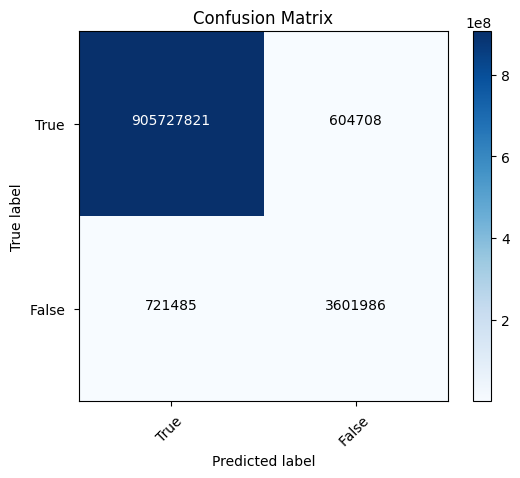

In [130]:
import matplotlib.pyplot as plt
import numpy as np

def plot_confusion_matrix(tp, fp, tn, fn):
    # Create confusion matrix array
    confusion_matrix = np.array([[tn, fp], [fn, tp]])

    # Set up labels for matrix
    labels = ['True ', 'False ']

    # Create color map
    cmap = plt.cm.Blues

    # Plot confusion matrix
    plt.imshow(confusion_matrix, interpolation='nearest', cmap=cmap)
    plt.title('Confusion Matrix')
    plt.colorbar()

    # Add labels to matrix cells
    thresh = confusion_matrix.max() / 2.
    for i, j in np.ndindex(confusion_matrix.shape):
        plt.text(j, i, format(confusion_matrix[i, j], 'd'), horizontalalignment='center', color='white' if confusion_matrix[i, j] > thresh else 'black')

    # Set tick labels
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=45)
    plt.yticks(tick_marks, labels)

    # Set axis labels
    plt.xlabel('Predicted label')
    plt.ylabel('True label')

    # Show plot
    plt.show()

plot_confusion_matrix(tp, fp, tn, fn)

In [131]:
accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = 2 * (precision * recall) / (precision + recall)

In [132]:
print(f"Accuracy : {accuracy*100}")
print(f"Precision : {precision*100}")
print(f"Recall : {recall*100}")
print(f"F1 Score : {f1_score*100}")

Accuracy : 99.85436948749033
Precision : 85.62510132659995
Recall : 83.3123663833989
F1 Score : 84.45290331429696


#### Question 2: Submit the `Accuracy, Precision, Recall and F1 Score` calculated in the previous cell.

Note: Paste the value of the common metrics for evaluation in the method `submit_accuracy_precision_recall_f1score` below.  
The tuple should have accuracy precision, recall and f1 score in the same order.

In [133]:
def submit_accuracy_precision_recall_f1score()->tuple:
    #Set the values here
    model_accuracy = 99.85436948749033
    model_precision = 85.62510132659995
    model_recall = 83.3123663833989
    model_f1score = 84.45290331429696
    # setting value ends
    return model_accuracy,model_precision,model_recall,model_f1score

In [134]:
# import torch
# import numpy as np
# from sklearn.metrics import confusion_matrix, classification_report

# gc.collect()


# def compute_metrics(model, dataloader, num_entries, threshold=0.33):
#     device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

#     predictions = []

#     # Counter to keep track of the number of entries processed
#     counter = 0  

#     with torch.no_grad():
#         for data in dataloader:
#             if counter >= num_entries:
#                 break  # Stop processing entries if the desired number is reached

#             images, targets = data['image'], data['mask']
#             images = images.to(device)
#             targets = targets.to(device)

#             logits = model(images)
#             probabilities = torch.sigmoid(logits)
#             prediction = (probabilities >= threshold).float()

#             prediction =  prediction.cpu()
#             targets = targets.cpu()
            
#             predictions.append(prediction)

#             model.zero_grad()
#             del images, targets, logits, probabilities, prediction
#             torch.cuda.empty_cache()

#             counter += 1

#     # Compute confusion matrix
#     y_true = np.concatenate([targets.cpu() for data in dataloader for targets in data['mask']])
#     y_pred = np.concatenate([prediction.cpu() for data in dataloader for prediction in predictions])
    
#     # y_true = np.concatenate([targets for targets in dataloader.dataset])
#     # y_pred = np.concatenate([predictions for predictions in predictions])

    
#     cm = confusion_matrix(y_true, y_pred)
    
#     # Compute classification report
#     class_names = ['Background', 'Tumor']
#     report = classification_report(y_true, y_pred, target_names=class_names)

#     # Return evaluation metrics, confusion matrix, and classification report
#     evaluation_results = {
#         'Confusion Matrix': cm,
#         'Classification Report': report
#     }

#     return evaluation_results

# num_entries = 5  # Specify the number of entries to evaluate
# evaluation_results = compute_metrics(nodel, test_dataloader, num_entries, threshold=0.33)

# # Print the evaluation results
# for metric, value in evaluation_results.items():
#     print(f'{metric}: {value}')

In [135]:
# def compute_scores_per_classes(model,          # nodel which is UNeT3D 
#                                dataloader,     # tuple consisting of ( id , image tensor , mask tensor )
#                                classes):       # classes : WT , TC , ET 
#     """
#     Compute Dice and Jaccard coefficients for each class.
#     Params:
#         model: neural net for make predictions.
#         dataloader: dataset object to load data from.
#         classes: list with classes.
#         Returns: dictionaries with dice and jaccard coefficients for each class for each slice.
#     """
#     device = 'cuda' if torch.cuda.is_available() else 'cpu'
#     dice_scores_per_classes = {key: list() for key in classes}
#     iou_scores_per_classes = {key: list() for key in classes}

#     with torch.no_grad():
#         for i, data in enumerate(dataloader):
#             imgs, targets = data['image'], data['mask']
#             imgs, targets = imgs.to(device), targets.to(device)
#             logits = model(imgs)
#             logits = logits.detach().cpu().numpy()
#             targets = targets.detach().cpu().numpy()
            
#             # Now finding the overlap between the raw prediction i.e. logit & the mask i.e. target & finding the dice & iou scores 
#             dice_scores = dice_coef_metric_per_classes(logits, targets)
#             iou_scores = jaccard_coef_metric_per_classes(logits, targets)

#             # storing both dice & iou scores in the list declared 
#             for key in dice_scores.keys():
#                 dice_scores_per_classes[key].extend(dice_scores[key])

#             for key in iou_scores.keys():
#                 iou_scores_per_classes[key].extend(iou_scores[key])

#     return dice_scores_per_classes, iou_scores_per_classes 

In [136]:
# val_dataloader = get_dataloader(BratsDataset, 'train_data.csv', phase='valid', fold=0)
# len(dataloader)

In [137]:
# nodel.eval()

In [138]:
# %%time
# dice_scores_per_classes, iou_scores_per_classes = compute_scores_per_classes(
#     nodel, val_dataloader, ['WT', 'TC', 'ET']
#     )

In [139]:
# dice_df = pd.DataFrame(dice_scores_per_classes)
# dice_df.columns = ['WT dice', 'TC dice', 'ET dice']

# iou_df = pd.DataFrame(iou_scores_per_classes)
# iou_df.columns = ['WT jaccard', 'TC jaccard', 'ET jaccard']
# # CONCAT BOTH THE COLUMNS ALONG AXIS 1 & SORT THE TWO 
# val_metics_df = pd.concat([dice_df, iou_df], axis=1, sort=True)
# val_metics_df = val_metics_df.loc[:, ['WT dice', 'WT jaccard', 
#                                       'TC dice', 'TC jaccard', 
#                                       'ET dice', 'ET jaccard']]
# val_metics_df.sample(5)

In [140]:
# colors = ['#35FCFF', '#FF355A', '#96C503', '#C5035B', '#28B463', '#35FFAF']
# palette = sns.color_palette(colors, 6)

# fig, ax = plt.subplots(figsize=(12, 6));
# sns.barplot(x=val_metics_df.mean().index, y=val_metics_df.mean(), palette=palette, ax=ax);
# ax.set_xticklabels(val_metics_df.columns, fontsize=14, rotation=15);
# ax.set_title("Dice and Jaccard Coefficients from Validation", fontsize=20)

# for idx, p in enumerate(ax.patches):
#         percentage = '{:.1f}%'.format(100 * val_metics_df.mean().values[idx])
#         x = p.get_x() + p.get_width() / 2 - 0.15
#         y = p.get_y() + p.get_height()
#         ax.annotate(percentage, (x, y), fontsize=15, fontweight="bold")

# fig.savefig("result1.png", format="png",  pad_inches=0.2, transparent=False, bbox_inches='tight')
# fig.savefig("result1.svg", format="svg",  pad_inches=0.2, transparent=False, bbox_inches='tight')

In [141]:
# def compute_results(model,
#                     dataloader,
#                     treshold=0.33):

#     device = 'cuda' if torch.cuda.is_available() else 'cpu'
#     results = {"Id": [],"image": [], "GT": [],"Prediction": []}

#     with torch.no_grad():
#         for i, data in enumerate(dataloader):
#             id_, imgs, targets = data['Id'], data['image'], data['mask']
#             imgs, targets = imgs.to(device), targets.to(device)
#             logits = model(imgs)
#             probs = torch.sigmoid(logits)
            
#             predictions = (probs >= treshold).float()
#             predictions =  predictions.cpu()
#             targets = targets.cpu()
            
#             results["Id"].append(id_)
#             results["image"].append(imgs.cpu())
#             results["GT"].append(targets)
#             results["Prediction"].append(predictions)
            
#             # only 5 pars
#             if (i > 5):
#                 return results
#         return results

In [142]:
# # prediction time starts(p0) 
# p0 = time.time()

In [143]:
# results = compute_results(
#     nodel, val_dataloader, 0.33)

In [144]:
# # total prediction time(pt) 
# p1 = time.time()
# pt = p1 - p0 
# print("Model prediction time ; ",pt ) 

In [145]:
# for id_, img, gt, prediction in zip(results['Id'][4:],
#                     results['image'][4:],
#                     results['GT'][4:],
#                     results['Prediction'][4:]
#                     ):
    
#     print(id_)
#     break

In [146]:
# show_result = ShowResult()
# show_result.plot(img, gt, prediction)

In [147]:
# class ImageReader:
#     def __init__(self, root:str, img_size:int=256, normalize:bool=False, single_class:bool=False):
#         pad_size = 256 if img_size > 256 else 224
#         self.resize = A.Compose(
#             [
#                 A.PadIfNeeded(min_height=pad_size, min_width=pad_size, value=0),
#                 A.Resize(img_size, img_size)
#             ]
#         )
#         self.normalize=normalize
#         self.single_class=single_class
#         self.root=root
        
#     def read_file(self, path:str) -> dict:
#         scan_type = path.split('_')[-1]
#         raw_image = nib.load(path).get_fdata()
#         raw_mask = nib.load(path.replace(scan_type, 'seg.nii')).get_fdata()
#         processed_frames, processed_masks = [], []
#         for frame_idx in range(raw_image.shape[2]):
#             frame = raw_image[:, :, frame_idx]
#             mask = raw_mask[:, :, frame_idx]
#             if self.normalize:
#                 if frame.max() > 0:
#                     frame = frame/frame.max()
#                 frame = frame.astype(np.float32)
#             else:
#                 frame = frame.astype(np.uint8)
#             resized = self.resize(image=frame, mask=mask)
#             processed_frames.append(resized['image'])
#             processed_masks.append(1*(resized['mask'] > 0) if self.single_class else resized['mask'])
#         return {
#             'scan': np.stack(processed_frames, 0),
#             'segmentation': np.stack(processed_masks, 0),
#             'orig_shape': raw_image.shape
#         }
    
#     def load_patient_scan(self, idx:int, scan_type:str='flair') -> dict:
#         patient_id = str(1).zfill(3) 
#         scan_filename = f'{self.root}/BraTS20_Training_{patient_id}/BraTS20_Training_{patient_id}_{scan_type}.nii'
#         return self.read_file(scan_filename)
    
# import plotly.graph_objects as go
# import numpy as np
# import plotly


# def generate_3d_scatter(
#     x:np.array, y:np.array, z:np.array, colors:np.array,
#     size:int=3, opacity:float=0.2, scale:str='Teal',
#     hover:str='skip', name:str='MRI'
# ) -> go.Scatter3d:
#     return go.Scatter3d(
#         x=x, y=y, z=z,
#         mode='markers', hoverinfo=hover,
#         marker = dict(
#             size=size, opacity=opacity,
#             color=colors, colorscale=scale
#         ),
#         name=name
#     )


# class ImageViewer3d():
#     def __init__(
#         self, reader:ImageReader, mri_downsample:int=10, mri_colorscale:str='Ice'
#     ) -> None:
#         self.reader = reader
#         self.mri_downsample = mri_downsample
#         self.mri_colorscale = mri_colorscale

#     def load_clean_mri(self, image:np.array, orig_dim:int) -> dict:
#         shape_offset = image.shape[1]/orig_dim
#         z, x, y = (image > 0).nonzero()
#         # only (1/mri_downsample) is sampled for the resulting image
#         x, y, z = x[::self.mri_downsample], y[::self.mri_downsample], z[::self.mri_downsample]
#         colors = image[z, x, y]
#         return dict(x=x/shape_offset, y=y/shape_offset, z=z, colors=colors)
#     def load_tumor_segmentation(self, image:np.array, orig_dim:int) -> dict:
#         tumors = {}
#         shape_offset = image.shape[1]/orig_dim
#         # 1/1, 1/3 si 1/5 pixeli pentru clasele tumorii  1(nucleu necrotic), 2(edem) si 4(tumoare de amplificare)
#         sampling = {
#             1: 1, 2: 3, 4: 5
#         }
#         for class_idx in sampling:
#             z, x, y = (image == class_idx).nonzero()
#             x, y, z = x[::sampling[class_idx]], y[::sampling[class_idx]], z[::sampling[class_idx]]
#             tumors[class_idx] = dict(
#                 x=x/shape_offset, y=y/shape_offset, z=z,
#                 colors=class_idx/4
#             )
#         return tumors
#     def collect_patient_data(self, scan:dict) -> tuple:
#         clean_mri = self.load_clean_mri(scan['scan'], scan['orig_shape'][0])
#         tumors = self.load_tumor_segmentation(scan['segmentation'], scan['orig_shape'][0])
#         markers_created = clean_mri['x'].shape[0] + sum(tumors[class_idx]['x'].shape[0] for class_idx in tumors)
#         return [
#             generate_3d_scatter(**clean_mri, scale=self.mri_colorscale, opacity=0.3, hover='skip', name='Brain MRI'),
#             generate_3d_scatter(**tumors[1], opacity=0.90, hover='all', name='Necrotic tumor core'),
#             generate_3d_scatter(**tumors[2], opacity=0.05, hover='all', name='Peritumoral invaded tissue'),
#             generate_3d_scatter(**tumors[4], opacity=0.30, hover='all', name='GD-enhancing tumor'),
#         ], markers_created
#     def get_3d_scan(self, patient_idx:int, scan_type:str='flair') -> go.Figure:
#         scan = self.reader.load_patient_scan(patient_idx, scan_type)
#         data, num_markers = self.collect_patient_data(scan)
#         fig = go.Figure(data=data)
#         fig.update_layout(
#             title=f"[Patient id:{patient_idx}] brain MRI scan ({num_markers} points)",
#             legend_title="Pixel class (click to enable/disable)",
#             font=dict(
#                 family="Courier New, monospace",
#                 size=14,
#             ),
#             margin=dict(
#                 l=0,r=0,b=0,t=30
#             ),
#             legend=dict(itemsizing='constant')
#         )
#         return fig

# # tumour visualization time starts(tv0)
# tv0 = time.time() 
# reader = ImageReader(config.train_root_dir, img_size=128, normalize=True, single_class=False)
# viewer = ImageViewer3d(reader, mri_downsample=25)

# fig = viewer.get_3d_scan(250, 'flair')
# plotly.offline.iplot(fig)

In [148]:
# # total tumour visualization time(tvt) 
# tv1 = time.time() 
# tvt = tv1 - tv0 
# print("3D Scatter plot time : ", tvt ) 

In [149]:
# import plotly.offline as pyo
# import plotly.graph_objects as go

# # Save the scatter plot as an image file
# filename = '/kaggle/working/scatter_plot.png'  # Replace with your desired file path
# pyo.plot(fig, filename=filename, auto_open=False)

In [150]:
# # total code wall time(cwt)
# cw1 = time.time() 
# cwt = cw1 - cw0 
# print("Total code wall time / running time : ", cwt )

In [151]:
# from tabulate import tabulate

# # Define the variables and their respective values
# variables = ['Data loading', 'data preprocessing', 'Stratification', 'Model training', 'tumour predction', 'tumour visualization', ' total code wall time']
# values = [dlt, dppt, skft, tt, pt, tvt, cwt]  # Assign the actual values to these variables

# # Create a list of lists containing the variables and values
# table_data = [[var, val] for var, val in zip(variables, values)]

# # Specify the table headers
# headers = ['Times', 'Value']

# # Generate the table using tabulate
# table = tabulate(table_data, headers, tablefmt='grid')

# # Print the table
# print(table)

In [152]:
# import matplotlib.pyplot as plt

# # Define the variables and their respective values (running times)
# variables = ['Data loading', 'data preprocessing', 'Stratification', 'Model training', 'tumour predction', 'tumour visualization', ' total code wall time']
# values = [dlt, dppt, skft, tt, pt, tvt, cwt]  # Assign the actual running times to these variables

# # Create a bar chart
# plt.figure(figsize=(10, 6))  # Set the figure size
# plt.bar(variables, values)  # Plot the bar chart

# # Add labels and title
# plt.xlabel('Variables')  # X-axis label
# plt.ylabel('Running Time')  # Y-axis label
# plt.title('Running Times of Variables')  # Chart title

# # Display the bar chart
# plt.show()

In [153]:
# gt = gt.squeeze().cpu().detach().numpy()
# gt = np.moveaxis(gt, (0, 1, 2, 3), (0, 3, 2, 1))
# wt,tc, et = gt
# print(wt.shape, tc.shape, et.shape)
# gt = (wt + tc + et)
# gt = np.clip(gt, 0, 1)
# print(gt.shape)

In [154]:
# %%time
# title = "Ground Truth_" + id_[0]
# filename1 = title + "_3d.gif"

# data_to_3dgif = Image3dToGIF3d(img_dim = (120, 120, 78), binary=True, normalizing=False)
# transformed_data = data_to_3dgif.get_transformed_data(gt)
# data_to_3dgif.plot_cube(
#     transformed_data,
#     title=title,
#     make_gif=True,
#     path_to_save=filename1
# )
# #show_gif(filename1, format='png')

In [155]:
# prediction = prediction.squeeze().cpu().detach().numpy()
# prediction = np.moveaxis(prediction, (0, 1, 2, 3), (0, 3, 2, 1))
# wt,tc,et = prediction
# print(wt.shape, tc.shape, et.shape)
# prediction = (wt + tc + et)
# prediction = np.clip(prediction, 0, 1)
# print(prediction.shape)

In [156]:
# %%time
# title = "Prediction_" + id_[0]
# filename2 = title + "_3d.gif"

# data_to_3dgif = Image3dToGIF3d(img_dim = (120, 120, 78), binary=True, normalizing=False)
# transformed_data = data_to_3dgif.get_transformed_data(prediction)
# data_to_3dgif.plot_cube(
#     transformed_data,
#     title=title,
#     make_gif=True,
#     path_to_save=filename2
# )
# #show_gif(filename2, format='png')#

In [157]:
# merging_two_gif(filename1,
#                 filename2, 
#                 'result.gif')
# show_gif('result.gif', format='png')

In [158]:
# import shutil

# shutil.make_archive('/kaggle/working/output_files', 'zip', '/kaggle/working')